In [88]:
import json
import pandas as pd
import sklearn
import seaborn

df = pd.read_json('all_data_array.json')

In [10]:
df.head()
df = df[df.branches_count != -1]
df = df[df.contributors_count != -1]
#df[['COL2', 'COL4']] = df[['COL2', 'COL4']].astype(int)

type_data = str(df.dtypes).split()
for i in xrange(0,len(type_data),2):
    column_name = type_data[i]
    column_type = type_data[i+1]
    if column_type == 'bool':
        df[column_name] = df[column_name].astype(int)

df.describe()

,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,898.000000
mean,17.234967,4037.897550,158.375278,2291.994432,0.954343,0.678174,0.955457,0.355234,0.721604,1.576191e+07,1.516704,240.591314,0.259465,37.397550,64.027840,6.485151e+04,11094.739421,11094.739421
std,63.189875,12353.407935,322.869780,4012.750466,0.208856,0.467437,0.206414,0.478851,0.448459,1.649912e+07,2.705593,537.714878,0.979468,180.420984,302.190078,2.034484e+05,10140.083277,10140.083277
min,1.000000,1.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.314000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+01,5327.000000,5327.000000
25%,2.000000,352.750000,30.000000,719.250000,1.000000,0.000000,1.000000,0.000000,0.000000,2.143211e+06,0.000000,26.000000,0.000000,4.000000,3.000000,2.440000e+03,6252.250000,6252.250000
50%,4.000000,1003.500000,71.000000,1394.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.055169e+07,1.000000,84.000000,0.000000,13.000000,23.000000,9.376000e+03,8331.000000,8331.000000
75%,10.000000,2799.750000,174.000000,2599.750000,1.000000,1.000000,1.000000,1.000000,1.000000,2.340553e+07,2.000000,225.750000,0.000000,33.000000,61.750000,4.371050e+04,12266.250000,12266.250000
max,980.000000,252695.000000,5640.000000,87195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.090548e+07,30.000000,9148.000000,13.000000,5000.000000,7020.000000,2.842284e+06,197985.000000,197985.000000


In [11]:
df.name

0                           systemjs
1               WaveFunctionCollapse
2                           composer
3                       idiomatic.js
4                      MBProgressHUD
5                             Swiper
6                                gor
8                             pandas
9                                  z
10               Material-Animations
11                         syncthing
12                    awesome-elixir
13                           Flat-UI
14                  computer-science
15                            zxcvbn
16                    tomorrow-theme
17                           pouchdb
18                             ievms
19                           masonry
20                             swift
21                VVDocumenter-Xcode
22                       picturefill
23                           jasmine
24                         ijkplayer
25               JSVerbalExpressions
26                            xctool
27                          material
2

In [12]:
df['is_legit'] = 1
non_legit = set()
for legit, name, lang ,counter in zip(df.is_legit, df.name, df.languages, range(df.languages.size)):
    if len(lang) == 0:
        non_legit.add(name)
        df.set_value(counter,'is_legit',0)
    counter += 1
non_legit

{u'AngularJS-Learning',
 u'Best-App',
 u'Front-end-Developer-Interview-Questions',
 u'HEAD',
 u'HowToBeAProgrammer',
 u'PokemonGo-Map',
 u'Projects',
 u'Qix',
 u'ToolsOfTheTrade',
 u'android-architecture',
 u'android-open-project',
 u'android-open-project-analysis',
 u'android_guides',
 u'angular-styleguide',
 u'awesome',
 u'awesome-android-ui',
 u'awesome-awesomeness',
 u'awesome-courses',
 u'awesome-cpp',
 u'awesome-design',
 u'awesome-electron',
 u'awesome-interview-questions',
 u'awesome-ios-ui',
 u'awesome-java',
 u'awesome-javascript',
 u'awesome-nodejs',
 u'awesome-osx-command-line',
 u'awesome-php',
 u'awesome-public-datasets',
 u'awesome-react',
 u'awesome-react-components',
 u'awesome-remote-job',
 u'awesome-ruby',
 u'awesome-shell',
 u'awesome-stock-resources',
 u'awesome-sysadmin',
 u'awesome-vue',
 u'awesome-wpo',
 u'blog',
 u'computer-science',
 u'css-modules',
 u'css-protips',
 u'deepdream',
 u'design',
 u'dive-into-machine-learning',
 u'docker-cheat-sheet',
 u'email-blu

In [13]:
df.columns

Index([      u'branches_count',        u'commits_count',
               u'contributors',   u'contributors_count',
                 u'created_at',          u'description',
                u'forks_count',        u'has_downloads',
               u'has_homepage',           u'has_issues',
                  u'has_pages',             u'has_wiki',
                         u'id', u'issue_comments_count',
                  u'languages',     u'milestones_count',
                       u'name',    u'open_issues_count',
           u'primary_language',       u'projects_count',
        u'pull_requests_count',        u'release_count',
                       u'size',          u'stars_count',
             u'watchers_count',             u'is_legit'],
      dtype='object')

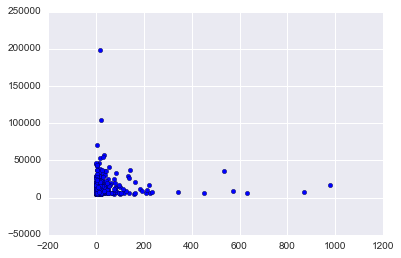

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge as lt
%matplotlib inline
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['branches_count'], df['stars_count'])
plt.show()

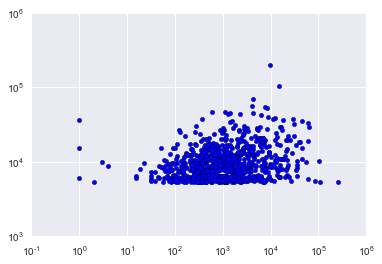

In [15]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df['commits_count'], df['stars_count'])
plt.show()

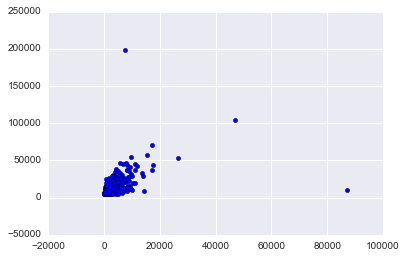

In [16]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['forks_count'], df['stars_count'])
plt.show()

#cdf fractions to analyze

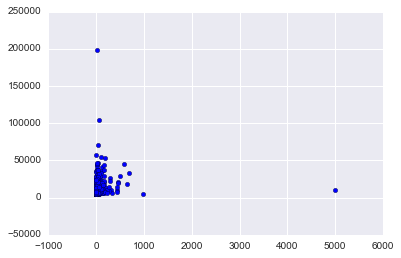

In [17]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['pull_requests_count'], df['stars_count'])
plt.show()

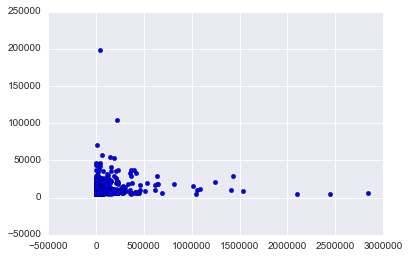

In [18]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['size'], df['stars_count'])
plt.show()

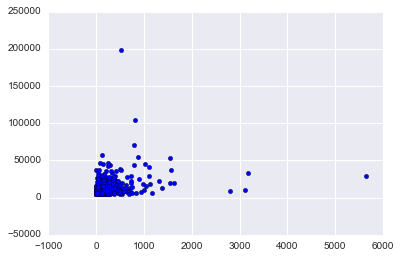

In [19]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['contributors_count'], df['stars_count'])
plt.show()

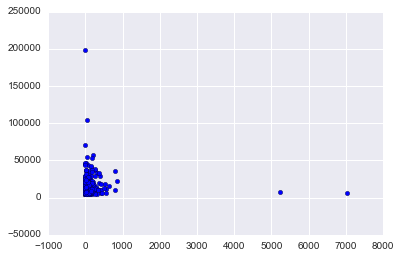

In [20]:
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['release_count'], df['stars_count'])
plt.show()

In [21]:
import numpy as np
df.columns
df.shape
df = df.reindex(np.random.permutation(df.index))

In [22]:
df.columns

Index([      u'branches_count',        u'commits_count',
               u'contributors',   u'contributors_count',
                 u'created_at',          u'description',
                u'forks_count',        u'has_downloads',
               u'has_homepage',           u'has_issues',
                  u'has_pages',             u'has_wiki',
                         u'id', u'issue_comments_count',
                  u'languages',     u'milestones_count',
                       u'name',    u'open_issues_count',
           u'primary_language',       u'projects_count',
        u'pull_requests_count',        u'release_count',
                       u'size',          u'stars_count',
             u'watchers_count',             u'is_legit'],
      dtype='object')

In [23]:
features = [ 'forks_count']
x_feature_train = df[features][:450]
y_feature_train = df['stars_count'][:450]
x_feature_test = df[features][450:]
y_feature_test = df['stars_count'][450:]
print x_feature.shape, y_feature.shape

NameError: name 'x_feature' is not defined

In [ ]:
regr = lt()
regr.fit(x_feature_train, y_feature_train)

In [ ]:
print regr.intercept_, regr.coef_

In [ ]:
print regr.score(x_feature_test, y_feature_test)

In [ ]:
df.head()

In [27]:
legit_df = df[df['is_legit'] == 1]
no_legit_df = df[df['is_legit'] == 0]

In [28]:
# focus on one language
legit_df.describe()

,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,8.100000e+02,810.000000,810.000000,810.000000,810.000000,810.000000,8.100000e+02,810.000000,810.000000,810.0
mean,15.888889,3832.209877,152.470370,2248.837037,0.951852,0.681481,0.953086,0.354321,0.714815,1.572067e+07,1.511111,234.874074,0.271605,36.753086,65.385185,6.281280e+04,11125.427160,11125.427160,1.0
std,53.062503,12079.575752,310.072582,3852.501322,0.214211,0.466190,0.211584,0.478603,0.451782,1.637445e+07,2.754118,530.601106,1.006927,184.726205,316.948152,1.990473e+05,10019.204458,10019.204458,0.0
min,1.000000,1.000000,1.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.314000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+01,5327.000000,5327.000000,1.0
25%,2.000000,367.000000,30.000000,700.750000,1.000000,0.000000,1.000000,0.000000,0.000000,2.248569e+06,0.000000,27.000000,0.000000,4.000000,3.000000,2.382250e+03,6262.250000,6262.250000,1.0
50%,4.000000,1005.000000,71.000000,1401.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.074246e+07,1.000000,85.500000,0.000000,13.500000,23.000000,8.944000e+03,8344.000000,8344.000000,1.0
75%,10.000000,2736.000000,172.250000,2582.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.313061e+07,2.000000,226.750000,0.000000,33.000000,61.000000,4.008500e+04,12354.500000,12354.500000,1.0
max,868.000000,252695.000000,5640.000000,87195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.090548e+07,30.000000,9148.000000,13.000000,5000.000000,7020.000000,2.842284e+06,197985.000000,197985.000000,1.0


In [106]:
def merge_describe_df(df1, df2, row_list):
    """
    Enter two dataframes produced by the describe() method and the rows you want to keep.
    The input dataframe order determines row order in output.
    """
    ddf1 = df1.describe()
    mean_df1_row = ddf1.iloc[row_list] # extracts the rows listed in the list
    ddf2 = df2.describe()
    mean_df2_row = ddf2.iloc[row_list]
    mean_df = mean_df1_row.append(mean_df2_row)
    return mean_df

merge_describe_df(no_legit_df, legit_df, [1]) # 1 for mean, 2 for std ....


,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
mean,29.625000,5931.159091,212.727273,2689.238636,0.977273,0.647727,0.977273,0.363636,0.784091,1.614149e+07,1.568182,293.215909,0.147727,43.329545,51.534091,83616.886364,10812.272727,10812.272727,0.0
mean,15.888889,3832.209877,152.470370,2248.837037,0.951852,0.681481,0.953086,0.354321,0.714815,1.572067e+07,1.511111,234.874074,0.271605,36.753086,65.385185,62812.798765,11125.427160,11125.427160,1.0


In [111]:
def has_lang(lang_name):
    """
    Specify a language name to only analyze repositories for that language.
    Outputs dataframe produced by describe() method.
    """
    df['has_' + lang_name] = df['languages'].apply(lambda a: lang_name in a)
    lang_df = df[df['has_' + lang_name]]
    return lang_df.describe()

merge_describe_df(has_lang('HTML'), has_lang('C++'), [1,2])


,branches_count,commits_count,contributors_count,forks_count,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count
mean,194.402225,35234.611173,877.426156,12659.008242,1.441699e+07,59.018141,1386.965990,55.936487,724.660043,1000.898159,414555.546439,31994.203828,31994.203828
std,349.344345,88024.325108,1930.796756,30164.114320,2.098897e+07,151.444360,3143.900296,152.422493,1734.297997,2437.467456,985242.591809,67204.479072,67204.479072
mean,164.134952,94114.425916,349.428654,3862.340909,1.673796e+07,14.118953,755.716484,12.361524,110.369149,773.566739,505406.222606,13899.829769,13899.829769
std,333.271057,220013.300979,531.891632,5548.961849,2.105754e+07,30.946009,1126.197583,31.461382,162.782481,1805.222383,959930.073390,16969.698480,16969.698480
